CALORIES BURNT PREDICTER

Importing the Dependencies

In [4]:
import numpy as np  # make arrays
import pandas as pd  # make dataframes (structured tables)
import matplotlib.pyplot as plt  # used for creating plots
import seaborn as sns  # used to make plots and graphs
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics  # used to evaluate model

Data processing

In [6]:
# loading from csv to pandas
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [7]:
calories.head(5)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the 2 data sets

In [10]:
calories_data = pd.concat([exercise, calories['Calories']], axis=1)

In [11]:
calories_data.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
calories_data.shape

(15000, 9)

In [13]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [14]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [16]:
# statistical values of the data set
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data visualization

In [18]:
sns.set(style='dark')

<Axes: xlabel='Gender', ylabel='count'>

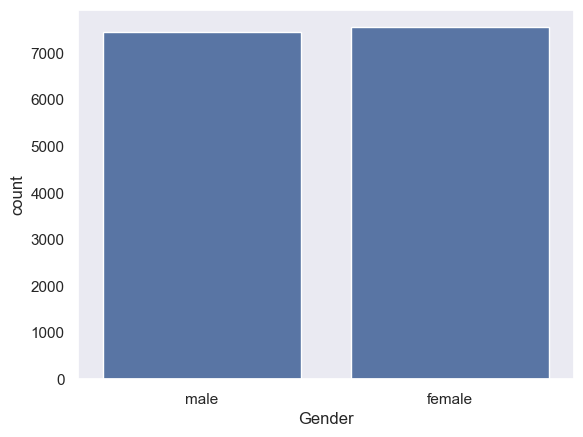

In [19]:
sns.countplot(x = 'Gender', data = calories_data)

<Axes: xlabel='Body_Temp', ylabel='Count'>

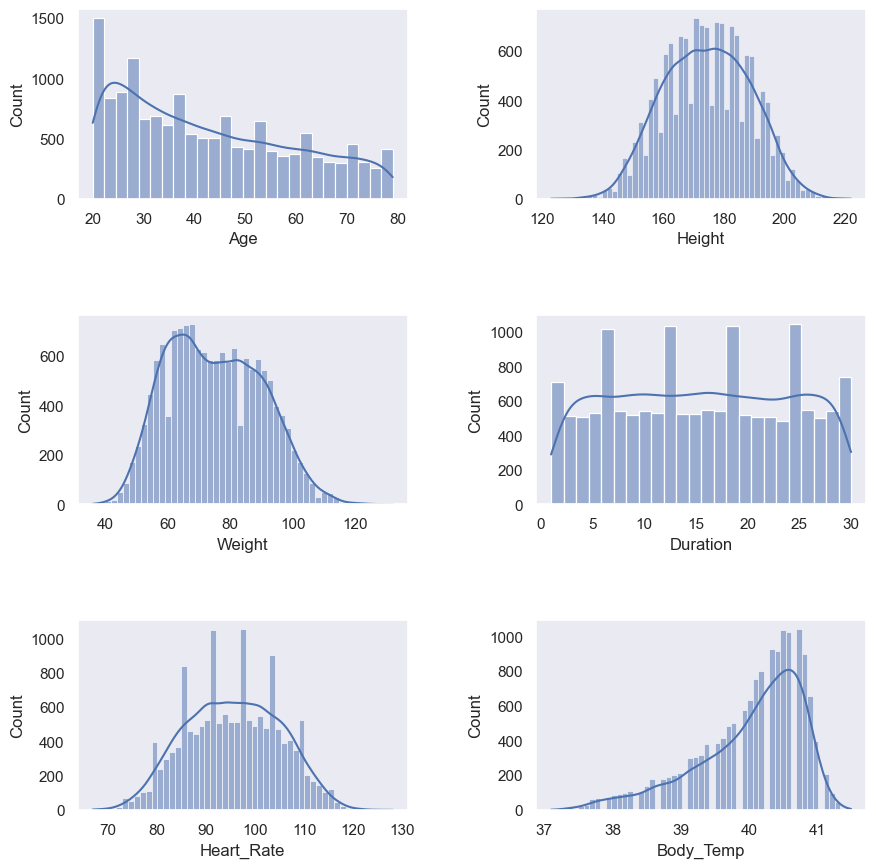

In [20]:
# Create a 3x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Adjust layout
fig.tight_layout(pad=5.0)

# Plot each distribution in a subplot
sns.histplot(calories_data['Age'], ax=axes[0, 0], kde=True)
sns.histplot(calories_data['Height'], ax=axes[0, 1], kde=True)
sns.histplot(calories_data['Weight'], ax=axes[1, 0], kde=True)
sns.histplot(calories_data['Duration'], ax=axes[1, 1], kde=True)
sns.histplot(calories_data['Heart_Rate'], ax=axes[2, 0], kde=True)
sns.histplot(calories_data['Body_Temp'], ax=axes[2, 1], kde=True)

In [21]:
calories_data = calories_data.drop(columns=['User_ID'], axis=1) # this is not required as feature

# used to understand specified colomn into binary dummy variables to vizualise the data
# drop_first helps in reducing collinearilty
#calories_data_1 = pd.get_dummies(calories_data, columns = ['Gender'], drop_first=True)

calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)
# this is done because the genders colmn is a string type and we wnat int64 type for correlation

correlation = calories_data.corr()
calories_data.head(5)

/var/folders/41/0m2z9dw56mv47pptr11y5ns40000gn/T/ipykernel_54050/3250677404.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':0,'female':1}}, inplace=True)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

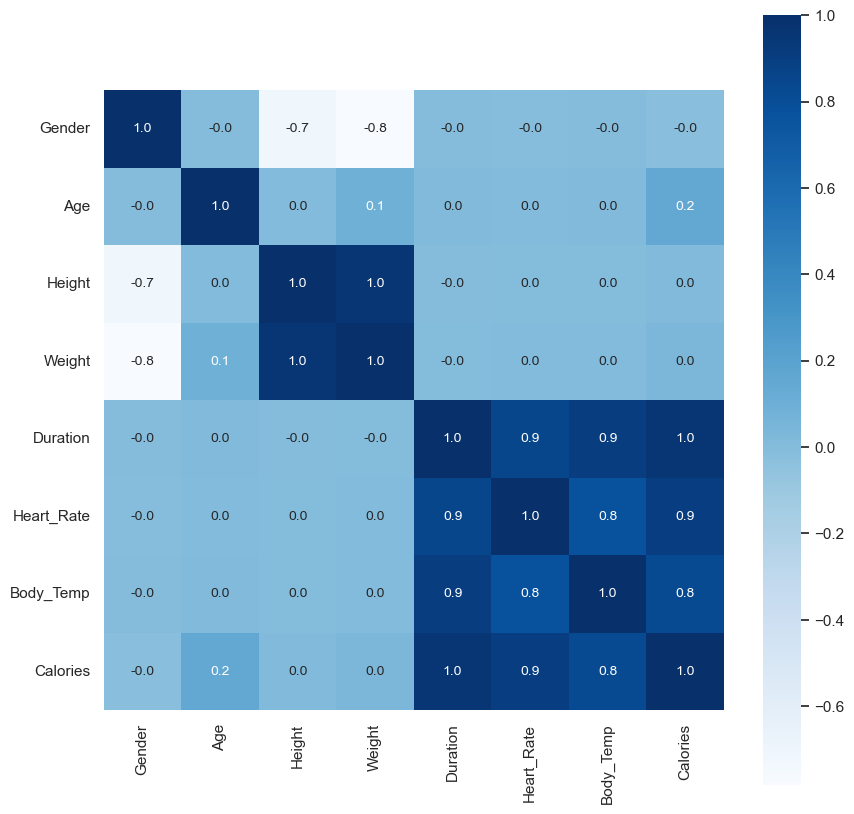

In [22]:
# heatmap for correlation

plt.figure(figsize=(10,10))
#sns.heatmap(correlation)
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

# correlation between the features
# if negative value then negative correlation
# if positive value then positive correlation

Features and Targets

In [24]:
X = calories_data.drop(columns=['Calories'], axis=1)
Y = calories_data['Calories']

Training and validation Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

Model Training

In [79]:
model = XGBRegressor(learning_rate= 0.2, reg_alpha=1, reg_lambda=1)

#from keras.layers import Dense
#from keras.models import Sequential
#
#model = Sequential([
#    Dense(126, activation='relu', input_shape=(X_train.shape[1],)),
#    Dense(52, activation='relu'),
#    Dense(26, activation='relu'),
#    Dense(1, activation= 'linear')
#])
#
#model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Model evaluation

Mean absolute error:  1.347373770053188
Root mean squared error:  1.917714171870597
R-squared score:  0.9990606847481638


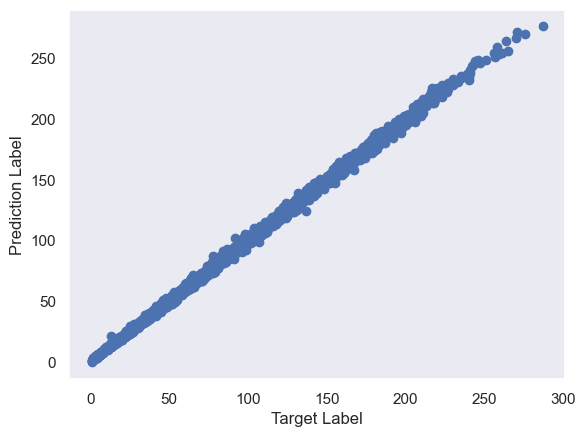

In [81]:
data_prediction = model.predict(X_test)

mae = metrics.mean_absolute_error(Y_test, data_prediction)
print("Mean absolute error: ", mae)

mse = metrics.mean_squared_error(Y_test, data_prediction)
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

r_sq = metrics.r2_score(Y_test, data_prediction)
print("R-squared score: ", r_sq)

#print(model.score(X_train, Y_train))
#print(model.score(X_test, Y_test))

plt.scatter(Y_test, data_prediction)
plt.xlabel('Target Label')
plt.ylabel('Prediction Label')
plt.show()

Creating a System

In [85]:
input = (0, 21, 181.0, 94.0, 80.0, 136.0, 60)
input_numpy = np.asarray(input)  # converting input to numpy
input_reshape = input_numpy.reshape(1,-1)  # reshaping the array to predict one instance

#input_reshape.shape

input_prediction = model.predict(input_reshape)

print(f"Calories burnt:{input_prediction}")

Calories burnt:[246.50021]
